In [30]:
from scipy import stats
from scipy.stats import t
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sp

np.set_printoptions(suppress=True, precision=4) # Suppressing scientific notations and printing the numpy arrays with precision of 4 decimal places

1) T-Test

In [3]:
def t_test(x, x_, n):
    err = x - x_

    if np.allclose(err, 0): # If all the errors are zeros
        print("\nPerfect fit: No errors, no t-test needed.")
        return

    err_mean = np.mean(err)
    err_std = np.std(err, ddof=1) # Sample Std Deviation
    se = err_std / math.sqrt(n)
    t_stat = err_mean / se
    p_val = t.sf(abs(t_stat), n-1) * 2 # Finding p
    alpha = 0.05

    if p_val < alpha:
        print("\nReject the null hypothesis at alpha as 0.05: Significant difference is there - Bad")
    else:
        print("\nFail to reject the null hypothesis at alpha as 0.05: No average difference - Good")

2) Newton's General Form of Interpolation

Divided Difference Table:
 [[  9.6      9.7      2.8333   0.5389  -0.0038  -0.0165   0.0031  -0.0004
    0.      -0.    ]
 [ 29.      18.2      6.0667   0.5083  -0.2022   0.0266  -0.0024   0.0002
   -0.       0.    ]
 [ 47.2     42.4667   9.1167  -1.5134   0.1168  -0.0048   0.0001  -0.
    0.       0.    ]
 [174.6     88.05    -4.5042  -0.2292   0.0589  -0.0039   0.       0.
    0.       0.    ]
 [350.7     61.025   -6.3375   0.3006   0.0159  -0.0034   0.       0.
    0.       0.    ]
 [594.8     23.      -4.2333   0.4433  -0.0183   0.       0.       0.
    0.       0.    ]
 [640.8     10.3     -2.0167   0.3333   0.       0.       0.       0.
    0.       0.    ]
 [651.1      4.25    -0.6833   0.       0.       0.       0.       0.
    0.       0.    ]
 [659.6      2.2      0.       0.       0.       0.       0.       0.
    0.       0.    ]
 [661.8      0.       0.       0.       0.       0.       0.       0.
    0.       0.    ]]

Interpolationg Polynomial: f(x) =  -2.31748754352238e

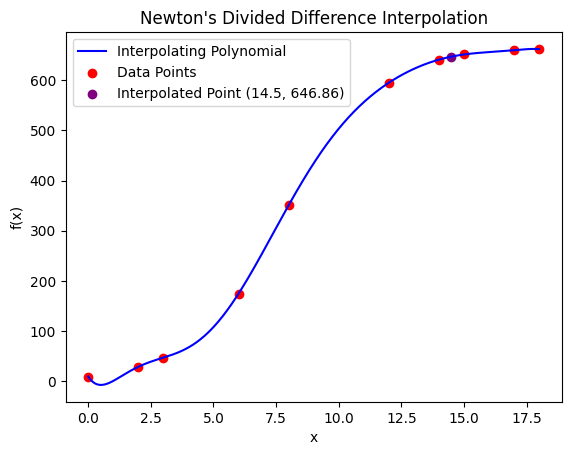

In [32]:
def div_diff_table(x, y, n):
    ddt = np.zeros((n, n))
    ddt[:, 0] = y # Filling the first column for all the rows with the f(x) values

    for j in range(1, n):
        for i in range(n-j):
            ddt[i][j] = (ddt[i+1][j-1] - ddt[i][j-1]) / (x[i+j] - x[i])

    return ddt

def newton_poly(ddt, x, y, n):
    x_sym = sp.symbols('x')
    term = 1
    f = y[0]

    for j in range(1, n):
        term *= (x_sym - x[j-1])
        f += term * ddt[0][j]

    return sp.sympify(f) # Gives the expression

def newton_interpolation(ddt, x, y, a, n):
    term = 1
    f = y[0]

    for j in range(1, n):
        term *= (a - x[j-1])
        f += term * ddt[0][j]

    return f

x = [0, 2, 3, 6, 8, 12, 14, 15, 17, 18]
y = [9.60, 29.00, 47.20, 174.60, 350.70, 594.80, 640.80, 651.10, 659.60, 661.80]

n = len(x)
ddt = div_diff_table(x, y, n)
print('Divided Difference Table:\n', ddt)
exp = newton_poly(ddt, x, y, n)
print('\nInterpolationg Polynomial: f(x) = ', exp)
a = 14.5
b = newton_interpolation(ddt, x, y, a, n) # Interpolated value at 14.5
print('\nInterpolated value at 14.5 = ', b)

# T-Test
y_ = []
for i in x:
    j = newton_interpolation(ddt, x, y, i, n)
    y_.append(j)
t_test(np.array(y), np.array(y_), n)
print()

f_ = sp.lambdify(sp.symbols('x'), exp, 'numpy') # Expression as a lambda function

# Plot
x_dense = np.linspace(min(x), max(x), 500) # Domain with no.of pts
y_dense = f_(x_dense)

plt.plot(x_dense, y_dense, label="Interpolating Polynomial", color='blue')
plt.scatter(x, y, color='red', label="Data Points")
plt.scatter([a], [b], color='purple', label=f"Interpolated Point (14.5, {b:.2f})")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Newton's Divided Difference Interpolation")
plt.legend()
plt.show()

3) Lagrange's Interpolation


Interpolationg Polynomial: f(x) =  14.5*x*(9/8 - x/16)*(17/15 - x/15)*(15/13 - x/13)*(7/6 - x/12)*(6/5 - x/10)*(4/3 - x/6)*(3/2 - x/4)*(3 - x) + 15.7333333333333*x*(6/5 - x/15)*(17/14 - x/14)*(5/4 - x/12)*(14/11 - x/11)*(4/3 - x/9)*(8/5 - x/5)*(2 - x/3)*(x - 2) + 29.1*x*(3/2 - x/12)*(17/11 - x/11)*(5/3 - x/9)*(7/4 - x/8)*(2 - x/6)*(4 - x/2)*(x/4 - 1/2)*(x/3 - 1) + 43.8375*x*(9/5 - x/10)*(17/9 - x/9)*(15/7 - x/7)*(7/3 - x/6)*(3 - x/4)*(x/6 - 1/3)*(x/5 - 3/5)*(x/2 - 3) + 49.5666666666667*x*(3 - x/6)*(17/5 - x/5)*(5 - x/3)*(7 - x/2)*(x/10 - 1/5)*(x/9 - 1/3)*(x/6 - 1)*(x/4 - 2) + 45.7714285714286*x*(9/2 - x/4)*(17/3 - x/3)*(15 - x)*(x/12 - 1/6)*(x/11 - 3/11)*(x/8 - 3/4)*(x/6 - 4/3)*(x/2 - 6) + 43.4066666666667*x*(6 - x/3)*(17/2 - x/2)*(x/13 - 2/13)*(x/12 - 1/4)*(x/9 - 2/3)*(x/7 - 8/7)*(x/3 - 4)*(x - 14) + 38.8*x*(18 - x)*(x/15 - 2/15)*(x/14 - 3/14)*(x/11 - 6/11)*(x/9 - 8/9)*(x/5 - 12/5)*(x/3 - 14/3)*(x/2 - 15/2) + 36.7666666666667*x*(x/16 - 1/8)*(x/15 - 1/5)*(x/12 - 1/2)*(x/10 - 4/5)*(x/6

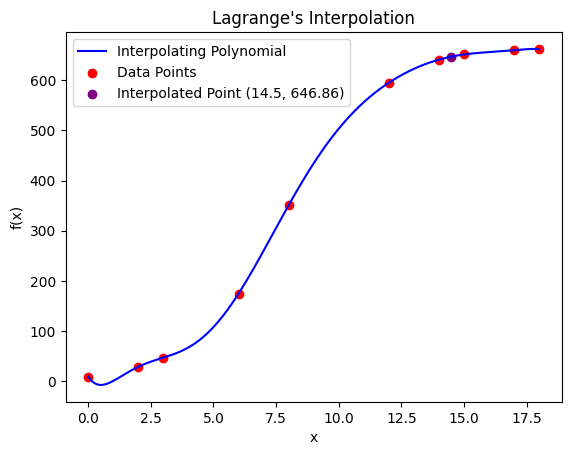

In [5]:
def lagrange_poly(x, y, n):
    x_sym = sp.symbols('x')
    f = 0

    for i in range(n):
        term = y[i]
        for j in range(n):
            if i != j:
                term *= (x_sym-x[j]) / (x[i] - x[j])
        f += term

    return sp.sympify(f)

def lagrange_interpolation(x, y, a, n):
    f = 0

    for i in range(n):
        term = y[i]
        for j in range(n):
            if i != j:
                term *= (a-x[j]) / (x[i] - x[j])
        f += term

    return f

x = [0, 2, 3, 6, 8, 12, 14, 15, 17, 18]
y = [9.60, 29.00, 47.20, 174.60, 350.70, 594.80, 640.80, 651.10, 659.60, 661.80]

n = len(x)
exp = lagrange_poly(x, y, n)
print('\nInterpolationg Polynomial: f(x) = ', exp)
a = 14.5
b = lagrange_interpolation(x, y, a, n) # Interpolated value at 14.5
print('\nInterpolated value at 14.5 = ', b)

# T-Test
y_ = []
for i in x:
    j = lagrange_interpolation(x, y, i, n)
    y_.append(j)
t_test(np.array(y), np.array(y_), n)
print()

f_ = sp.lambdify(sp.symbols('x'), exp, 'numpy') # Expression as a lambda function

# Plot
x_dense = np.linspace(min(x), max(x), 500)
y_dense = f_(x_dense)

plt.plot(x_dense, y_dense, label="Interpolating Polynomial", color='blue')
plt.scatter(x, y, color='red', label="Data Points")
plt.scatter([a], [b], color='purple', label=f"Interpolated Point (14.5, {b:.2f})")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Lagrange's Interpolation")
plt.legend()
plt.show()

4. Newton Gregory's Forward Interpolation

x =  [0.     1.5708 3.1416 4.7124 6.2832 7.854  9.4248]
y =  [ 0.      0.4559  0.     -0.0948 -0.      0.0197  0.    ]

Divided Difference Table:
 [[ 0.      0.4559 -0.9119  1.273  -1.4446  1.3516 -0.9582]
 [ 0.4559 -0.4559  0.3612 -0.1716 -0.093   0.3933  0.    ]
 [ 0.     -0.0948  0.1896 -0.2646  0.3003  0.      0.    ]
 [-0.0948  0.0948 -0.0751  0.0357  0.      0.      0.    ]
 [-0.      0.0197 -0.0394  0.      0.      0.      0.    ]
 [ 0.0197 -0.0197  0.      0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      0.    ]]

Interpolationg Polynomial: f(x) =  -0.000847271514566233*x*(0.636619772367581*x - 5)*(0.636619772367581*x - 4)*(0.636619772367581*x - 3)*(0.636619772367581*x - 2)*(0.636619772367581*x - 1) + 0.00717041435363807*x*(0.636619772367581*x - 4)*(0.636619772367581*x - 3)*(0.636619772367581*x - 2)*(0.636619772367581*x - 1) - 0.0383200436580215*x*(0.636619772367581*x - 3)*(0.636619772367581*x - 2)*(0.636619772367581*x - 1) + 0.135073119362051*

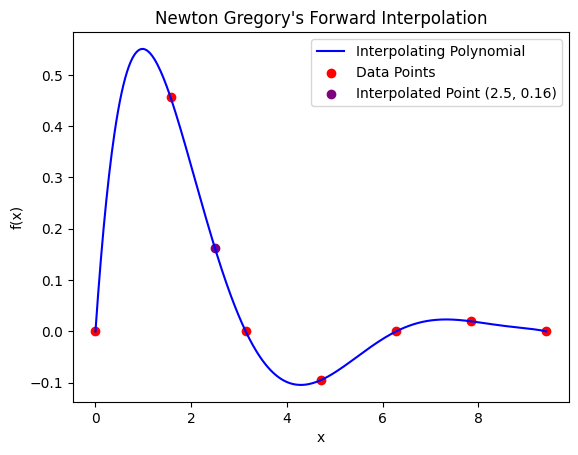

In [7]:
def gregory_div_diff_table(x, y, n):
    ddt = np.zeros((n, n))
    ddt[:, 0] = y # Filling the first column for all the rows with the f(x) values

    for j in range(1, n):
        for i in range(n-j):
            ddt[i][j] = ddt[i+1][j-1] - ddt[i][j-1]

    return ddt

def newton_gregory_fwd_poly(ddt, x, y, n):
    x_sym = sp.symbols('x')
    h = x[1] - x[0]
    u = (x_sym-x[0]) / h
    f = y[0]
    term = 1

    for j in range(1, n):
        term *= u-j+1
        f += (term * ddt[0][j]) / math.factorial(j)

    return f

def newton_gregory_fwd(ddt, x, y, a, n):
    h = x[1] - x[0]
    u = (a-x[0]) / h
    f = y[0]
    term = 1

    for j in range(1, n):
        term *= u-j+1
        f += (term * ddt[0][j]) / math.factorial(j)

    return f

x = np.linspace(0, 3*np.pi, 7) # Equally spaced 7 values from 0 to 3*pi
y = np.sin(x) * np.exp(-x/2)
print('x = ', x)
print('y = ', y)

n = len(x)
ddt = gregory_div_diff_table(x, y, n)
print('\nDivided Difference Table:\n', ddt)
exp = newton_gregory_fwd_poly(ddt, x, y, n)
print('\nInterpolationg Polynomial: f(x) = ', exp)
a = 2.5
b = newton_gregory_fwd(ddt, x, y, a, n) # Interpolated value at 2.5
print('\nInterpolated value at 2.5 = ', b)

# T-Test
y_ = []
for i in x:
    j = newton_gregory_fwd(ddt, x, y, i, n)
    y_.append(j)
t_test(np.array(y), np.array(y_), n)
print()

f_ = sp.lambdify(sp.symbols('x'), exp, 'numpy') # Expression as a lambda function

# Plot
x_dense = np.linspace(min(x), max(x), 500)
y_dense = f_(x_dense)

plt.plot(x_dense, y_dense, label="Interpolating Polynomial", color='blue')
plt.scatter(x, y, color='red', label="Data Points")
plt.scatter([a], [b], color='purple', label=f"Interpolated Point (2.5, {b:.2f})")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Newton Gregory's Forward Interpolation")
plt.legend()
plt.show()

5) Newton Gregory's Backward Interpolation

x =  [0.     1.5708 3.1416 4.7124 6.2832 7.854  9.4248]
y =  [ 0.      0.4559  0.     -0.0948 -0.      0.0197  0.    ]

Divided Difference Table:
 [[ 0.      0.4559 -0.9119  1.273  -1.4446  1.3516 -0.9582]
 [ 0.4559 -0.4559  0.3612 -0.1716 -0.093   0.3933  0.    ]
 [ 0.     -0.0948  0.1896 -0.2646  0.3003  0.      0.    ]
 [-0.0948  0.0948 -0.0751  0.0357  0.      0.      0.    ]
 [-0.      0.0197 -0.0394  0.      0.      0.      0.    ]
 [ 0.0197 -0.0197  0.      0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      0.    ]]

Interpolationg Polynomial: f(x) =  -0.000847271514566233*x*(0.636619772367581*x - 5)*(0.636619772367581*x - 4)*(0.636619772367581*x - 3)*(0.636619772367581*x - 2)*(0.636619772367581*x - 1) + 0.00717041435363807*x*(0.636619772367581*x - 4)*(0.636619772367581*x - 3)*(0.636619772367581*x - 2)*(0.636619772367581*x - 1) - 0.0383200436580215*x*(0.636619772367581*x - 3)*(0.636619772367581*x - 2)*(0.636619772367581*x - 1) + 0.135073119362051*

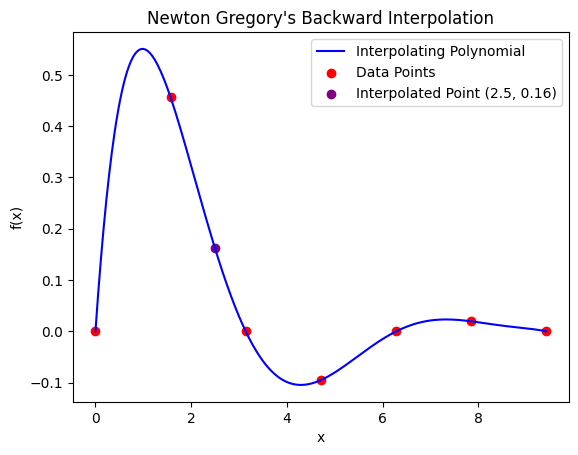

In [8]:
def gregory_div_diff_table(x, y, n):
    ddt = np.zeros((n, n))
    ddt[:, 0] = y # Filling the first column for all the rows with the f(x) values

    for j in range(1, n):
        for i in range(n-j):
            ddt[i][j] = ddt[i+1][j-1] - ddt[i][j-1]

    return ddt

def newton_gregory_bwd_poly(ddt, x, y, n):
    x_sym = sp.symbols('x')
    h = x[1] - x[0]
    u = (x_sym-x[0]) / h
    f = y[0]
    term = 1

    for j in range(1, n):
        term *= u-j+1
        f += (term * ddt[0][j]) / math.factorial(j)

    return f

def newton_gregory_bwd(ddt, x, y, a, n):
    h = x[1] - x[0]
    v = (a-x[-1]) / h
    f = y[-1]
    term = 1

    for j in range(1, n):
        term *= v+j-1
        f += (term * ddt[n-j-1][j]) / math.factorial(j)

    return f

x = np.linspace(0, 3*np.pi, 7) # Equally spaced 7 values from 0 to 3*pi
y = np.sin(x) * np.exp(-x/2)
print('x = ', x)
print('y = ', y)

n = len(x)
ddt = gregory_div_diff_table(x, y, n)
print('\nDivided Difference Table:\n', ddt)
exp = newton_gregory_bwd_poly(ddt, x, y, n)
print('\nInterpolationg Polynomial: f(x) = ', exp)
a = 2.5
b = newton_gregory_bwd(ddt, x, y, a, n) # Interpolated value at 2.5
print('\nInterpolated value at 2.5 = ', b)

# T-Test
y_ = []
for i in x:
    j = newton_gregory_bwd(ddt, x, y, i, n)
    y_.append(j)
t_test(np.array(y), np.array(y_), n)
print()

f_ = sp.lambdify(sp.symbols('x'), exp, 'numpy') # Expression as a lambda function

# Plot
x_dense = np.linspace(min(x), max(x), 500)
y_dense = f_(x_dense)

plt.plot(x_dense, y_dense, label="Interpolating Polynomial", color='blue')
plt.scatter(x, y, color='red', label="Data Points")
plt.scatter([a], [b], color='purple', label=f"Interpolated Point (2.5, {b:.2f})")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Newton Gregory's Backward Interpolation")
plt.legend()
plt.show()

6) Natural Cubic Spline Interpolation

Equations to solve:
 [Eq(8*f''2 + 2.5*f''3, 9.6), Eq(2.5*f''2 + 9.0*f''3, -9.6)]

Solutions:  {f''2: 1.67908745247148, f''3: -1.53307984790875}

SODs:  [0, 1.67908745247148, -1.53307984790875, 0]

Polynomials:
-1.41977186311787*x + 0.186565272496831*(x - 3)**3 + 6.75931558935361
1.9384030418251*x + 0.111939163498099*(7 - x)**3 - 9.31346007604563*(0.222222222222222*x - 1)**3 - 9.47186311787072
-1.51102661596958*x - 0.127756653992395*(9 - x)**3 + 14.0992395437262

Interpolated value at 5 =  1.1028897338403336


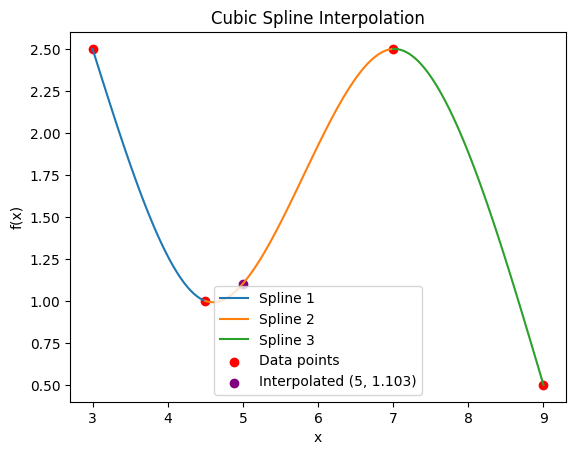

In [24]:
def row(xi, xi_minus1, xi_plus1, f_xi, f_xi_minus1, f_xi_plus1): # For coefficients of the SOD's and the RHS vals
    a = xi - xi_minus1
    b = 2 * (xi_plus1 - xi_minus1)
    c = xi_plus1 - xi
    rhs = (6 * (f_xi_plus1 - f_xi)) / c
    rhs -= (6 * (f_xi - f_xi_minus1)) / a

    return a, b, c, rhs

def cubic_spline_poly(xi_minus1, xi, f_xi_minus1, f_xi, f__xi_minus1, f__xi):
    x_sym = sp.symbols('x')
    h = xi - xi_minus1
    term1 = (f__xi_minus1 * (xi-x_sym)**3) / (6*h)
    term2 = (f__xi * (x_sym-xi_minus1)**3) / (6*h)
    term3 = ((f_xi/h) - ((f__xi * h) / 6)) * (x_sym-xi_minus1)
    term4 = ((f_xi_minus1/h) - ((f__xi_minus1 * h) / 6)) * (xi-x_sym)

    return term1 + term2 + term3 + term4

x = [3, 4.5, 7, 9]
f = [2.5, 1, 2.5, 0.5]
k = 5

n = len(x)
vars = sp.symbols(f"f''1:{n}")
eqns = []

for i in range(1, n-1):
    a, b, c, rhs = row(x[i], x[i-1], x[i+1], f[i], f[i-1], f[i+1])
    eqn = 0

    if i > 1:
        eqn += a * vars[i-1]
    eqn += b * vars[i]
    if i < n-2:
        eqn += c * vars[i+1]

    eqns.append(sp.Eq(eqn, rhs)) # Creates an equation

print('Equations to solve:\n', eqns)
solns = sp.solve(eqns, vars) # Solves the system of equations
print('\nSolutions: ', solns)
f__ = [0] + [solns[i] for i in solns] + [0]
print('\nSODs: ', f__)
polys = []

print('\nPolynomials:')
for i in range(1, n):
    poly = cubic_spline_poly(x[i-1], x[i], f[i-1], f[i], f__[i-1], f__[i])
    print(poly)
    polys.append(poly)

for i in range(n-1):
    if k > x[i] and k < x[i+1]:
        f_ = sp.lambdify(sp.symbols('x'), polys[i])
        k_ = f_(k)
        break

print('\nInterpolated value at 5 = ', k_)

# Plot
for i in range(n-1):
    poly = sp.lambdify(sp.symbols('x'), polys[i], "numpy")
    x_dense = np.linspace(x[i], x[i+1], 100)
    plt.plot(x_dense, poly(x_dense), label=f"Spline {i+1}")

# Data points
plt.scatter(x, f, color="red", label="Data points")

# Highlight interpolated point
plt.scatter([k], [k_], color="purple", label=f"Interpolated (5, {k_:.3f})")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Cubic Spline Interpolation")
plt.legend()
plt.show()

7) Trapezoidal Rule - Numerical Integration

Exact integral =  6.41110148275803

Trapezoidal Area =  6.411095290222728



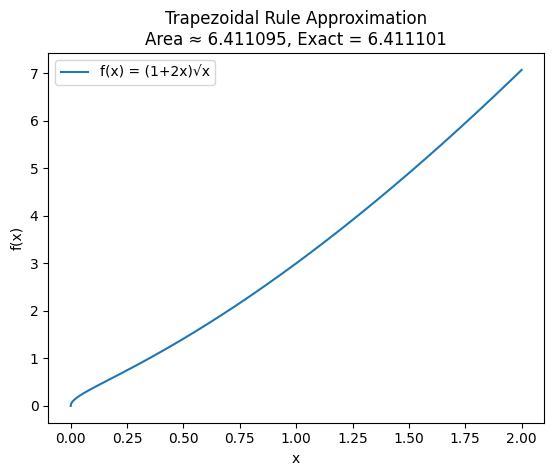

In [26]:
x = sp.symbols('x')
f_expn = (1 + 2*x) * sp.sqrt(x)
res = sp.integrate(f_expn, (x, 0, 2)) # Computes symbolic integral
print("Exact integral = ", res.evalf()) # Exact result
f = sp.lambdify(x, f_expn, 'numpy')

# Trapezoidal rule
def trapezoidal(a, b, n):
    h = (b-a) / (n-1) # n-1 intervals for n pts
    x_vals = np.linspace(a, b, n)
    y_vals = f(x_vals)
    area = (h/2) * (y_vals[0] + 2*np.sum(y_vals[1:n-1]) + y_vals[-1])
    print("\nTrapezoidal Area = ", area)
    print()

    # Plot
    plt.plot(x_vals, y_vals, label="f(x) = (1+2x)√x")

    plt.title(f"Trapezoidal Rule Approximation\nArea ≈ {area:.6f}, Exact = {float(res.evalf()):.6f}")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.show()

trapezoidal(0, 2, 2001)

8) Simpson's 1/3rd Rule - Numerical Integration

Exact integral =  6.41110148275803

Simpson Area = 6.41109891636509



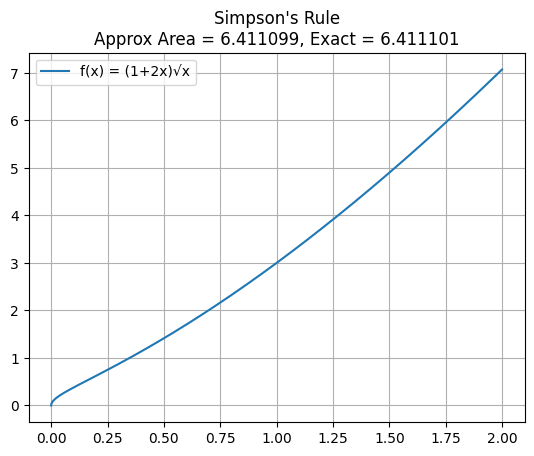

In [29]:
x = sp.symbols('x')
f_expn = (1 + 2*x) * sp.sqrt(x)
res = sp.integrate(f_expn, (x, 0, 2)) # Computes symbolic integral
print("Exact integral = ", res.evalf()) # Exact result
f = sp.lambdify(x, f_expn, 'numpy')

# Simpson's Rule
def simpson(a, b, n):
    if n % 2 == 0:
        print("Simpson's rule requires an odd number of points (even subintervals) !")
        return
    h = (b-a)/(n-1)
    x_vals = np.linspace(a, b, n)
    y_vals = f(x_vals)
    area = (h/3) * (y_vals[0] + y_vals[-1] + 4*np.sum(y_vals[1:n-1:2]) + 2*np.sum(y_vals[2:n-2:2]))
    print("\nSimpson Area =", area)
    print()

    # Plot
    plt.plot(x_vals, y_vals, label="f(x) = (1+2x)√x")
    plt.title(f"Simpson's Rule\nApprox Area = {area:.6f}, Exact = {float(res.evalf()):.6f}")
    plt.legend()
    plt.grid(True)
    plt.show()

simpson(0, 2, 2001)

9) Euler's Method - Numerical Differentiation

      x   y_exact   y_euler  Difference  Rel Error (%)
0  0.00  1.000000  1.000000    0.000000       0.000000
1  0.25  1.336914  1.250000   -0.086914      -6.501096
2  0.50  1.890625  1.669263   -0.221362     -11.708417
3  0.75  2.743164  2.315263   -0.427902     -15.598832
4  1.00  4.000000  3.266262   -0.733738     -18.343458

t = -0.4349, df = 7.45, p-value = 0.675984

Polynomial approximation =  0.249999999999996*x**4 + 0.500000000000006*x**3 + 1.25000000000001*x**2 + 0.999999999999998*x + 1.0

Derivative =  0.999999999999983*x**3 + 1.50000000000002*x**2 + 2.50000000000001*x + 0.999999999999998



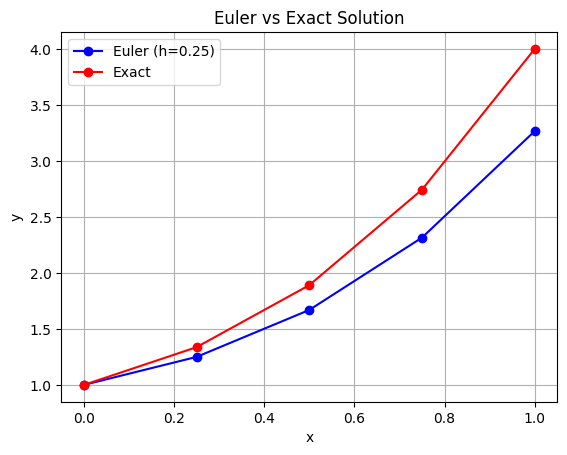

In [34]:
def exact(x):
    return ((x + x**2 + 2) / 2) ** 2

# ODE: dy/dx = (1+2x)*sqrt(y)
def f(x, y):
    return (1 + 2*x) * np.sqrt(y)

h = 0.25
x = np.arange(0, 1.25, h) # Domain with step size

# Euler Method
y_euler = [1]
for i in range(len(x)-1):
    y_next = y_euler[-1] + h*f(x[i], y_euler[-1])
    y_euler.append(y_next)

y_exact = [exact(xi) for xi in x]

# Error analysis
diff = np.array(y_euler) - np.array(y_exact)
rel = diff / np.array(y_exact) * 100

df = pd.DataFrame({
    "x": x,
    "y_exact": y_exact,
    "y_euler": y_euler,
    "Difference": diff,
    "Rel Error (%)": rel
})
print(df)

# Welch's t-test (Euler vs Exact)
mean1, mean2 = np.mean(y_euler), np.mean(y_exact)
var1, var2 = np.var(y_euler, ddof=1), np.var(y_exact, ddof=1)
n1, n2 = len(y_euler), len(y_exact)

t_stat = (mean1 - mean2) / np.sqrt(var1/n1 + var2/n2)
dfree = (var1/n1 + var2/n2)**2 / (((var1/n1)**2)/(n1-1) + ((var2/n2)**2)/(n2-1))
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), dfree))

print(f"\nt = {t_stat:.4f}, df = {dfree:.2f}, p-value = {p_value:.6f}")

# Polynomial fit of exact data
coeffs = np.polyfit(x, y_exact, 4)  # use smaller degree (4) to avoid overfitting
x_var = sp.symbols('x')
poly = sum(c*x_var**i for i, c in enumerate(coeffs[::-1]))
derivative = sp.diff(poly, x_var)
print("\nPolynomial approximation = ", poly)
print("\nDerivative = ", derivative)
print()

# Plot
plt.plot(x, y_euler, 'o-', label="Euler (h=0.25)", color="blue")
plt.plot(x, y_exact, 'o-', label="Exact", color="red")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Euler vs Exact Solution")
plt.grid(True)
plt.show()

10) RK4 method - Numerical Differentiation

Paired t-test (RK4 vs Analytical): (np.float64(0.005711227371060313), np.float64(0.9955554536726932))



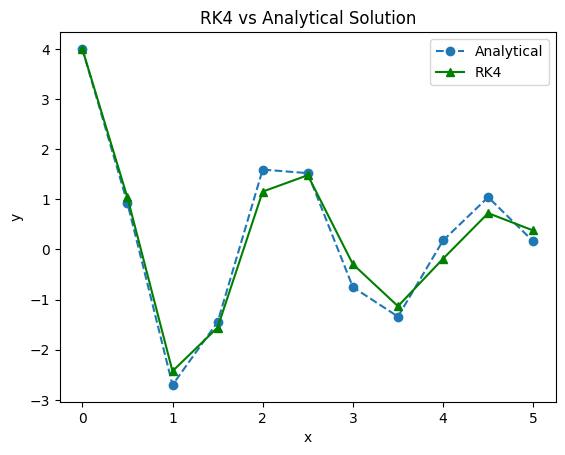

In [37]:
h = 0.5
x_start, x_end = 0, 5

# ODE: y'' + 0.6 y' + 8 y = 0
def derivatives(y, yp): # Returns dy/dx and dyp/dx
    dy = yp
    dyp = -0.6*yp - 8*y
    return dy, dyp

# Analytical solution: y(x) = e^(-0.3x)(C1 cos(βx) + C2 sin(βx))
beta = math.sqrt(7.91)
C1 = 4
C2 = 1.2 / beta
def analytical_solution(x):
    return np.exp(-0.3*x) * (C1*np.cos(beta*x) + C2*np.sin(beta*x))

# RK4 Method
x_vals = [x_start]
y_vals = [4.0]   # y(0) = 4
yp_vals = [0.0]  # y'(0) = 0

while x_vals[-1] < x_end:
    x, y, yp = x_vals[-1], y_vals[-1], yp_vals[-1]

    k1_y, k1_yp = derivatives(y, yp)
    k2_y, k2_yp = derivatives(y + h/2*k1_y, yp + h/2*k1_yp)
    k3_y, k3_yp = derivatives(y + h/2*k2_y, yp + h/2*k2_yp)
    k4_y, k4_yp = derivatives(y + h*k3_y, yp + h*k3_yp)

    y_next  = y  + h/6*(k1_y + 2*k2_y + 2*k3_y + k4_y)
    yp_next = yp + h/6*(k1_yp + 2*k2_yp + 2*k3_yp + k4_yp)

    x_vals.append(x + h)
    y_vals.append(y_next)
    yp_vals.append(yp_next)

x_vals = np.array(x_vals)
y_vals = np.array(y_vals)
y_exact = analytical_solution(x_vals)

# Paired t-test
def paired_ttest(x, y):
    d = np.array(x) - np.array(y)
    n = len(d)
    d_mean = np.mean(d)
    d_std = np.std(d, ddof=1)
    t_stat = d_mean / (d_std / np.sqrt(n))
    p_value = 2*(1 - t.cdf(abs(t_stat), df=n-1))
    return t_stat, p_value

print("Paired t-test (RK4 vs Analytical):", paired_ttest(y_exact, y_vals))
print()

# Plot
plt.plot(x_vals, y_exact, "o--", label="Analytical")
plt.plot(x_vals, y_vals, "^-", label="RK4", color="green")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("RK4 vs Analytical Solution")
plt.show()

11) Queue Simulation

Total arrivals = 91
Total served   = 86
Avg wait time  = 21.71
Avg # in queue = 1.72
Server utilization = 0.88


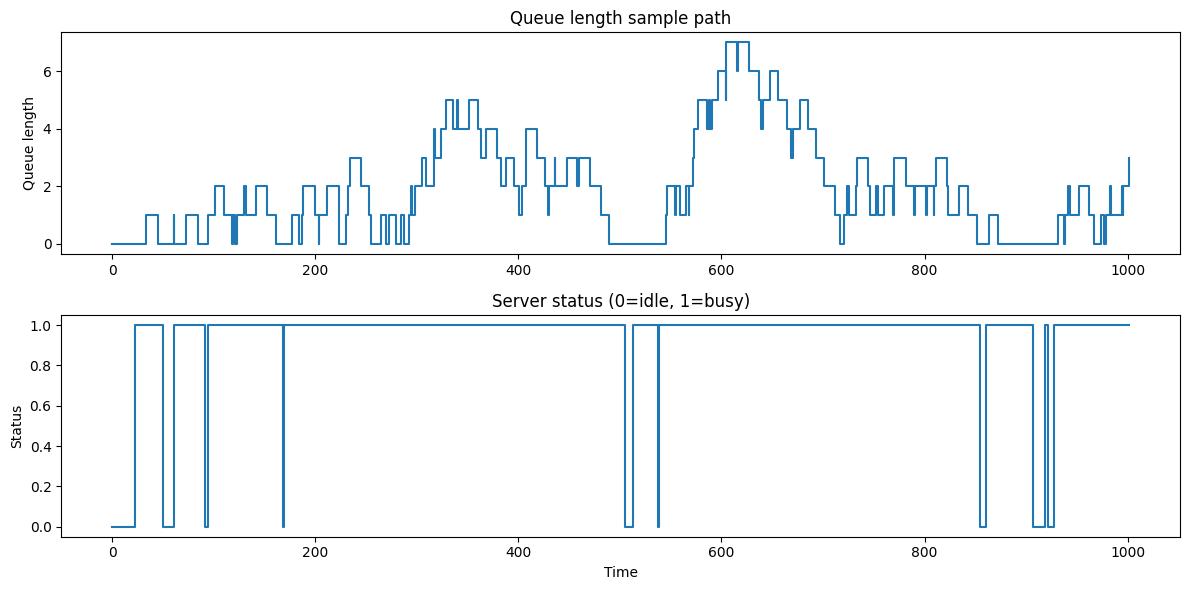

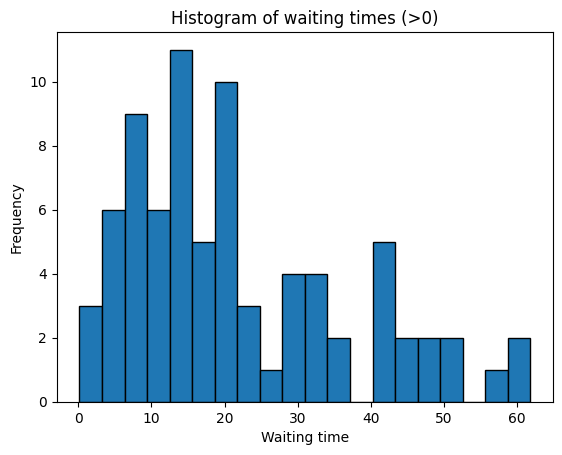

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import random

# ---------------- Parameters ----------------
SIM_TIME = 1000
MEAN_IAT = 10
SERVICE_RANGE = (8, 12)

# ---------------- State ----------------
clock = 0.0
next_arrival = random.expovariate(1 / MEAN_IAT)
next_departure = float('inf')
queue = []
server_busy = False
waiting_times = []

# For performance measures
area_q = area_busy = 0.0
num_arrivals = num_served = 0

# For plotting
t_points, q_points, s_points = [0], [0], [0]

def gen_interarrival(): return random.expovariate(1 / MEAN_IAT)
def gen_service(): return random.randint(*SERVICE_RANGE)

# ---------------- Simulation Loop ----------------
while clock < SIM_TIME:
    next_event = min(next_arrival, next_departure)
    time_passed = next_event - clock

    # Update time-average stats
    area_q += len(queue) * time_passed
    area_busy += server_busy * time_passed

    clock = next_event
    t_points.append(clock)
    q_points.append(len(queue))
    s_points.append(int(server_busy))

    if next_arrival <= next_departure:  # Arrival
        num_arrivals += 1
        next_arrival = clock + gen_interarrival()
        if not server_busy:  # server idle
            server_busy = True
            next_departure = clock + gen_service()
            waiting_times.append(0)
        else:
            queue.append(clock)
    else:  # Departure
        num_served += 1
        if queue:
            arrival_time = queue.pop(0)
            wait = clock - arrival_time
            waiting_times.append(wait)
            next_departure = clock + gen_service()
        else:
            server_busy = False
            next_departure = float('inf')

# ---------------- Results ----------------
avg_wait = np.mean([w for w in waiting_times if w > 0]) if waiting_times else 0
print(f"Total arrivals = {num_arrivals}")
print(f"Total served   = {num_served}")
print(f"Avg wait time  = {avg_wait:.2f}")
print(f"Avg # in queue = {area_q/clock:.2f}")
print(f"Server utilization = {area_busy/clock:.2f}")

# ---------------- Plots ----------------
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.step(t_points, q_points, where='post')
plt.title("Queue length sample path")
plt.ylabel("Queue length")

plt.subplot(2, 1, 2)
plt.step(t_points, s_points, where='post')
plt.title("Server status (0=idle, 1=busy)")
plt.xlabel("Time")
plt.ylabel("Status")

plt.tight_layout()
plt.show()

# Histogram of waits > 0
positive_waits = [w for w in waiting_times if w > 0]
if positive_waits:
    plt.hist(positive_waits, bins=20, edgecolor='black')
    plt.title("Histogram of waiting times (>0)")
    plt.xlabel("Waiting time")
    plt.ylabel("Frequency")
    plt.show()

12) Inventory Simulation

In [39]:
import numpy as np
import pandas as pd
import random

# Parameters
cost_per_paper, selling_price, scrap_value = 0.30, 0.45, 0.05
condition_probs = {"high": 0.35, "moderate": 0.45, "low": 0.20}
condition_ranges = {"high": (1, 35), "moderate": (36, 80), "low": (81, 100)}

# Demand distribution lookup
demand_cumulative = {
    40: {"high": 0.03, "moderate": 0.10, "low": 0.44},
    50: {"high": 0.08, "moderate": 0.28, "low": 0.66},
    60: {"high": 0.23, "moderate": 0.68, "low": 0.82},
    70: {"high": 0.43, "moderate": 0.88, "low": 0.94},
    80: {"high": 0.78, "moderate": 0.96, "low": 1.00},
    90: {"high": 0.93, "moderate": 1.00, "low": 1.00},
    100: {"high": 1.00, "moderate": 1.00, "low": 1.00},
}

# Preprocess demand ranges
def build_ranges():
    lookup = {d: {} for d in demand_cumulative}
    for cond in condition_probs:
        prev = 0
        for d in sorted(demand_cumulative):
            upper = int(demand_cumulative[d][cond] * 100)
            if upper > prev:
                lookup[d][cond] = (prev + 1, upper)
                prev = upper
    return lookup

demand_ranges = build_ranges()

# Helpers
def determine_condition(r):
    for cond, (low, high) in condition_ranges.items():
        if low <= r <= high:
            return cond
    return None

def calculate_demand(cond, r):
    for d, rngs in demand_ranges.items():
        low, high = rngs.get(cond, (0, 0))
        if low <= r <= high:
            return d
    return max(demand_ranges)  # fallback

def simulate_day(stock):
    cond = determine_condition(random.randint(1, 100))
    demand = calculate_demand(cond, random.randint(1, 100))
    sold = min(stock, demand)
    leftover = max(0, stock - demand)
    unmet = max(0, demand - stock)

    revenue = sold * selling_price + leftover * scrap_value
    cost = stock * cost_per_paper
    profit = revenue - cost

    return {"condition": cond, "demand": demand, "sold": sold,
            "leftover": leftover, "unmet": unmet, "profit": profit}

def run_sim(days, stock):
    df = pd.DataFrame([simulate_day(stock) for _ in range(days)])
    return df

# Run simulations
stock = 70
for days in [200, 500, 1000, 10000]:
    df = run_sim(days, stock)
    print(f"\n--- {days} days ---")
    print(df[["profit"]].describe())
    print(f"Avg daily profit: {df['profit'].mean():.2f}")

# Part (a) – 100 random numbers for conditions
nums = np.random.randint(1, 101, 100)
conds = [determine_condition(r) for r in nums]
print("\nCondition counts from 100 random numbers:")
print(pd.Series(conds).value_counts())

# Part (b) – Distributions
def generate_samples(dist_func, n=100, low=0, high=100):
    samples = []
    while len(samples) < n:
        x = dist_func()
        if low <= x <= high:
            samples.append(x)
    return samples

exp_samples = generate_samples(lambda: np.random.exponential(50))
norm_samples = generate_samples(lambda: np.random.normal(50, 10))
pois_samples = generate_samples(lambda: np.random.poisson(50))

print("\nFirst 10 exponential samples (high):", np.round(exp_samples[:10], 2))
print("First 10 normal samples (moderate):", np.round(norm_samples[:10], 2))
print("First 10 poisson samples (low):", pois_samples[:10])



--- 200 days ---
           profit
count  200.000000
mean     6.440000
std      4.650217
min     -1.500000
25%      2.500000
50%      6.500000
75%     10.500000
max     10.500000
Avg daily profit: 6.44

--- 500 days ---
          profit
count  500.00000
mean     6.57200
std      4.36726
min     -1.50000
25%      2.50000
50%      6.50000
75%     10.50000
max     10.50000
Avg daily profit: 6.57

--- 1000 days ---
            profit
count  1000.000000
mean      6.980000
std       4.135057
min      -1.500000
25%       2.500000
50%       6.500000
75%      10.500000
max      10.500000
Avg daily profit: 6.98

--- 10000 days ---
             profit
count  10000.000000
mean       6.598400
std        4.322428
min       -1.500000
25%        2.500000
50%        6.500000
75%       10.500000
max       10.500000
Avg daily profit: 6.60

Condition counts from 100 random numbers:
moderate    47
high        31
low         22
Name: count, dtype: int64

First 10 exponential samples (high): [55.34  4.7  12

13) Dynamical System

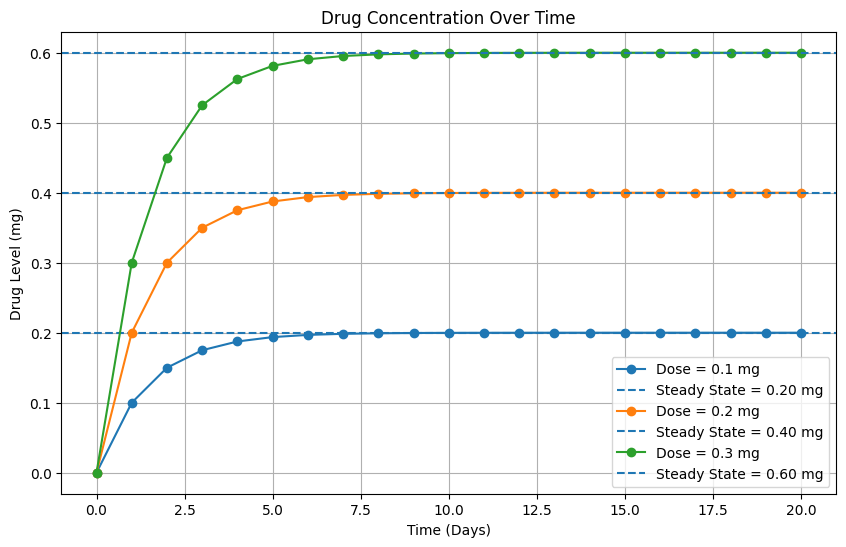

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dose_levels = [0.1, 0.2, 0.3]
decay = 0.5
days = 20

plt.figure(figsize=(10, 6))

for dose in dose_levels:
    conc = [0]  # starting level
    for _ in range(days):
        conc.append(decay * conc[-1] + dose)

    # Plot curve and steady-state
    plt.plot(conc, marker='o', label=f'Dose = {dose} mg')
    plt.axhline(y=2*dose, ls='--', label=f'Steady State = {2*dose:.2f} mg')

# Formatting
plt.xlabel('Time (Days)')
plt.ylabel('Drug Level (mg)')
plt.title('Drug Concentration Over Time')
plt.legend()
plt.grid(True)
plt.show()
